## Graficador da Base de dados Reais e dos poços de classificação (Bacia do Parana)

In [1]:
####################PACOTES###########################
%matplotlib inline
import numpy as np
import pylab as py
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import Latex
from pandas import Series, DataFrame
from pandas.plotting import scatter_matrix
import sys

#---------------------
sys.path.insert(0,'../modules')
from appynho import plotagem as plm
from appynho_2 import plotagem as plm2

#######################################################

# Banco de dados sintético convertido em real

In [2]:
DB= pd.read_csv("../inputs/Real/1RCH0001SC/perfis_1RCH0001SC.txt", sep='\s+' , skiprows=2, 
                names=('Rock', 'Code' ,'Depth' ,'RHOB', 'GR','SP','DT'))
df=pd.DataFrame(DB)
#df

In [3]:
# Dado ja filtrado pelos codigos de rocha equivocados!

#df=df.drop([0])#retira cabeçalho

df=df.drop('Code',axis=1) #retira a coluna codigo
df=df.drop('Depth',axis=1) #retira a coluna prof
#df

In [4]:
#Cria o dicionário de cores do meu modelo baseado em moriak

# segundo método
#codigo={'#3fff00':'Shale',
#       '#ffff3f' :'Sandstone',
#       '#ff00ff' :'Diabase',
#       '#0eec5d' :'Diamictite',
#       '#4effff' :'Calcilutite',
#       '#2f0eff' :'Marl',
#       '#af1d4e' :'Siltite',
#       '#7eff00' :'Claystone'}

codigo = {#6:['#50ffff','Calciferous_mudstone'],
           # 8:['#0080ef','Calciferous_sandstone'],
            42:['#ffbf20','Conglomerate'],
            44:['#10ef60','Diamictite'],
            49:['#ffff40','Sandstone'],
            54:['#af2050','Siltstone'],
            56:['#80ff00','Mudstone'],
            57:['#40ff00','Shale'],
            58:['#3010ff','Marlstone'],
            65:['#ff00ff','Diabase'],
            66:['#f900f9','Basalt'],
            70:['#ff0000' ,'Metamorphic']}

cores = {#'#50ffff':'Calciferous_Mudstone',
            '#0080ef':'Calciferous_Sandstone',
            '#ffbf20':'Conglomerate',
            '#10ef60':'Diamictite',
            '#ffff40':'Sandstone',
            '#af2050':'Siltstone',
            '#80ff00':'Mudstone',
            '#40ff00':'Shale',
            '#3010ff':'Marlstone',
            '#ff00ff':'Diabase',
            '#f900f9':'Basalt',
            '#ff0000' :'Metamorphic'}

print(codigo.keys(),type(codigo))

dict_keys([42, 44, 49, 54, 56, 57, 58, 65, 66, 70]) <class 'dict'>


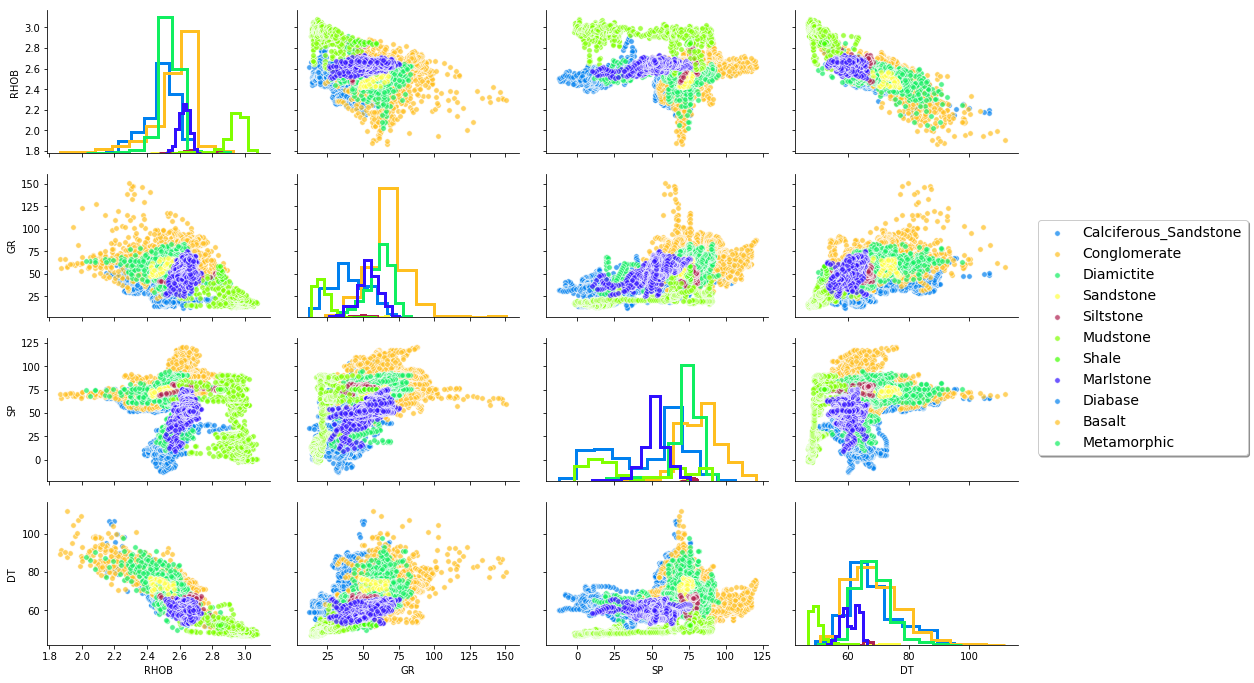

In [5]:
g = sns.PairGrid(df,hue='Rock',hue_order=None, palette=cores.keys(), height=2.4, aspect=1.5 )
#g = sns.PairGrid(df,hue='Rock', height=2.4, aspect=1.5 )
g.map_diag(plt.hist, histtype="step", linewidth=3) #ERROR
g.map_offdiag(sns.scatterplot, linewidths=1, edgecolor="w", s=30, alpha=0.7 )
g.fig.legend(labels=cores.values(), fontsize=14, loc='center right', bbox_to_anchor=(1.21, 0.5),
             fancybox=True, shadow=True, ncol=(1))

g.savefig('../images/1RCH0001SC_260620a.pdf', dpi = 300, bbox_inches = 'tight', transparent = True)

# Dispersão 1TP0003SC:

histtype : {'bar', 'barstacked', 'step', 'stepfilled'}, optional
The type of histogram to draw.

'bar' is a traditional bar-type histogram. If multiple data are given the bars are arranged side by side.
'barstacked' is a bar-type histogram where multiple data are stacked on top of each other.
'step' generates a lineplot that is by default unfilled.
'stepfilled' generates a lineplot that is by default filled.
Default is 'bar'

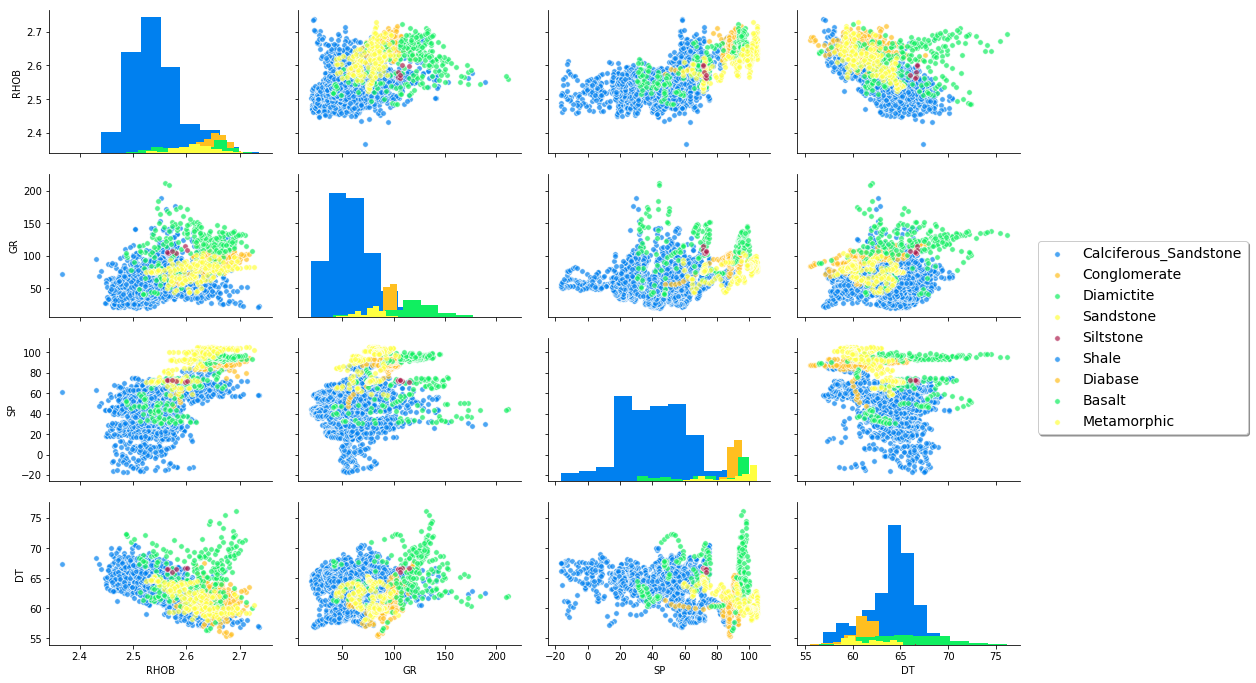

In [11]:
poco2 = pd.read_csv("../inputs/Real/1TP0003SC/perfis_1TP0003SC.txt", sep='\s+' , 
                 skiprows=2, names=('Rock', 'Code' ,'Depth' ,'RHOB', 'GR','SP','DT'))
dp=pd.DataFrame(poco2)

dp=dp.drop('Code',axis=1) #retira a coluna codigo
dp=dp.drop('Depth',axis=1) #retira a coluna prof

cores2 = {#'#50ffff':'Calciferous_Mudstone',
            '#0080ef':'Calciferous_Sandstone',
            '#ffbf20':'Conglomerate',
            '#10ef60':'Diamictite',
            '#ffff40':'Sandstone',
            '#af2050':'Siltstone',
           # '#80ff00':'Mudstone',
            '#40ff00':'Shale',
           # '#3010ff':'Marlstone',
            '#ff00ff':'Diabase',
            '#f900f9':'Basalt',
            '#ff0000' :'Metamorphic'}

g = sns.PairGrid(dp,hue='Rock',hue_order=None, palette=cores2.keys(), height=2.4, aspect=1.5 )
g.map_diag(plt.hist, histtype="barstacked", linewidth=3) #ERROR
g.map_offdiag(sns.scatterplot, linewidths=1, edgecolor="w", s=30, alpha=0.7 )
g.fig.legend(labels=cores2.values(), fontsize=14, loc='center right', bbox_to_anchor=(1.21, 0.5),
             fancybox=True, shadow=True, ncol=(1))

g.savefig('../images/1TP0003SC_260620a.pdf', dpi = 100, bbox_inches = 'tight', transparent = True)


# Classificação

In [15]:
# lê os dados de perfiliagem e rochas originais
poco = pd.read_csv("../inputs/Real/1TP0003SC/perfis_1TP0003SC.txt", sep='\s+' , 
                 skiprows=2, names=('Rock', 'Code' ,'Depth' ,'RHOB', 'GR','SP','DT'))
cod = np.array(poco.Code)
prof = np.array(poco.Depth)
RHOB = np.array(poco.RHOB)
GR = np.array(poco.GR)
SP = np.array(poco.SP)
DT = np.array(poco.DT)

In [16]:
# Leituras dos dados classificados:

# Le os dados da classificacao Euclideana:
euclides = pd.read_csv('../outputs/Sintetico/Result_eucli_C1_normalizado_convolvido.txt', 
                       sep='\s+' , names=('Depth' ,'Character', 'ClassEucli'))
#print(euclides)
ClassEuclides = np.array(euclides.ClassEucli)
#print(ClassEuclides)

#Lê os dados da classificação Mahalanobeana
maha = pd.read_csv('../outputs/Sintetico/Result_maha_C1_normalizado_convolvido.txt', 
                   sep='\s+' , names=('Depth' ,'Character', 'ClassMaha'))

ClassMahalanobis = np.array(maha.ClassMaha)

#Lê os dados da classificação Kohoneana
koho = pd.read_csv('../outputs/Real/CLASS_260620a.txt', 
                   sep='\s+', names=('Depth' ,'Character1', 'ClassKoho', 'Character2','Real','Character3'))

ClassKohonen = np.array(koho.ClassKoho)

#print(koho)


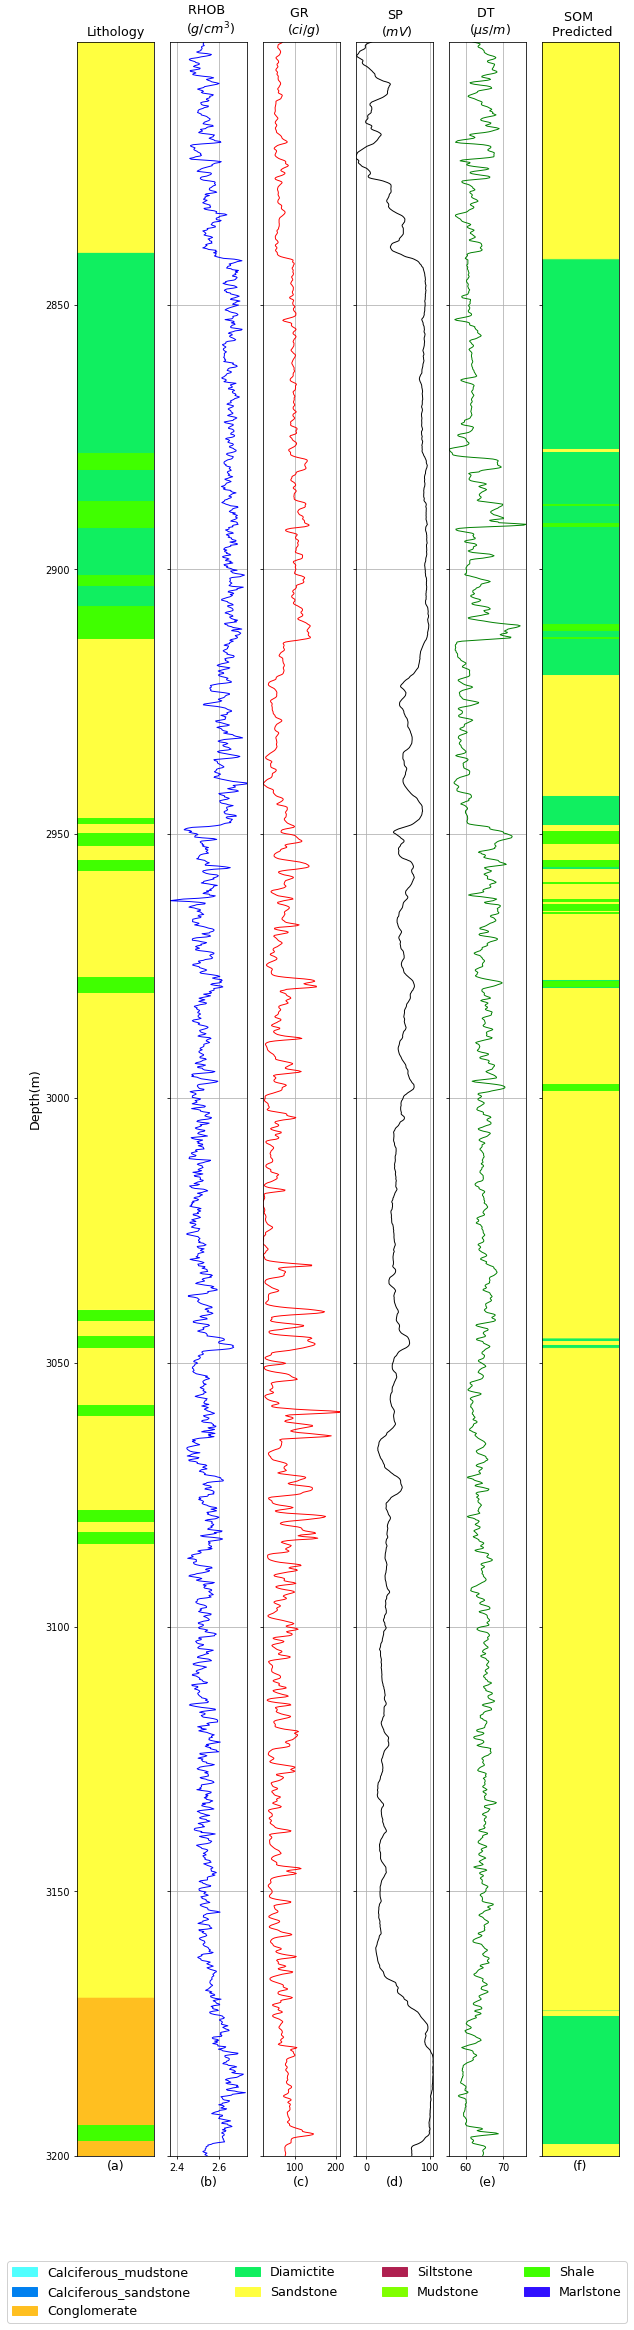

In [24]:

codigo = {6:['#50ffff','Calciferous_mudstone'],
            8:['#0080ef','Calciferous_sandstone'],
            42:['#ffbf20','Conglomerate'],
            44:['#10ef60','Diamictite'],
            49:['#ffff40','Sandstone'],
            54:['#af2050','Siltstone'],
            56:['#80ff00','Mudstone'],
            57:['#40ff00','Shale'],
            58:['#3010ff','Marlstone'],
            65:['#ff00ff','Diabase'],
            66:['#f900f9','Basalt'],
            70:['#ff0000' ,'Metamorphic']}

#figure = plm(6,altura=9,comprimento=14,dpi=300)
#figure.plot_l(0,cod,prof, codigo, GR,minimo=1,maximo=1.000001,titulo='Lithology \n True', descricao_y='Depth(m)', legend=True, descricao_x='(a)')#0 é aprosição do track
#figure.plot_s(1,RHOB,prof,cor='b',titulo='RHOB \n $(g/cm^{3})$',descricao_x='(b)')
#figure.plot_s(2,GR,prof,cor='r',titulo='GR \n $(ci/g$)',descricao_x='(c)')
#figure.plot_s(3,SP,prof,cor='k',titulo='SP\n $(mV)$',descricao_x='(d)')
#figure.plot_s(4,DT,prof,cor='g',titulo='DT \n $(\mu s/m)$',descricao_x='(e)')
##figure.plot_l(5,ClassEuclides,prof, codigo, GR,minimo=1,maximo=5,titulo='EC \n Predicted', descricao_x='(f)')#0 é aprosição do track
##figure.plot_l(6,ClassMahalanobis,prof, codigo, GR,minimo=1,maximo=5,titulo='MC\n Predicted', descricao_x='(g)')
#figure.plot_l(5,ClassKohonen,prof, codigo, GR,minimo=1,maximo=5,titulo='SOM \n Predicted', descricao_x='(h)')
                          
padrao={'comprimento':10,
            'altura':40
}
#Desenha os plots
figure2 = plm2(6, padrao)
figure2.plot_l2(0,cod,prof, codigo,{'titulo':'Lithology', 'descricao_y':'Depth(m)','descricao_x':'(a)'})
figure2.plot_s(1,RHOB,prof,{'titulo':'RHOB \n $(g/cm^{3})$','cor':'b','alfabeto':'b','descricao_x':'(b)'})
figure2.plot_s(2,GR,prof,{'titulo':'GR \n $(ci/g$)','cor':'r','descricao_x':'(c)'})
figure2.plot_s(3,SP,prof,{'titulo':'SP\n $(mV)$', 'cor':'k','descricao_x':'(d)'})
figure2.plot_s(4,DT,prof,{'titulo':'DT \n $(\mu s/m)$','cor':'g','descricao_x':'(e)'})
figure2.plot_l2(5,ClassKohonen,prof, codigo,{'titulo':'SOM \n Predicted', 'descricao_y':'Depth(m)','descricao_x':'(f)'})
figure2.legenda({'ancoragem':(-0.9, 0.09, 8.0, -0.14),'colunas':4,'ordem':[0,1,2,3,4,5,6,7,8] })


plt.savefig('../images/result260620a.pdf', dpi=300, bbox_inches = 'tight', transparent = True)
#plt.savefig('../../Latex/imagens/wellC1.pdf', dpi=300, bbox_inches = 'tight', transparent = True)

# FIM